## Capital Asset Pricing Model

### We will work with Walmart and S&P market index

### Step 1: Import libraries and read data using yahoo finance
#### 1.1: Import libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb   

#### 1.2: Read historical data for 'Walmart'  and 'S&P' using yahoo finance (from 2012-1-1)

In [2]:
tickers = ['WMT', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1')['Adj Close'] #read data dynamically from yahoo finance  

In [3]:
data.head()

,WMT,^GSPC
Date,,
2012-01-03,48.581551,1277.060059
2012-01-04,48.082275,1277.300049
2012-01-05,47.848751,1281.060059
2012-01-06,47.510532,1277.810059
2012-01-09,47.655472,1280.699951


#### NOTE: Here, we are using Adjusted Close price for our work

### Step 2: Evaluating log returns, covariance of portfolio, covariance of asset with with index and market variance

#### We will first analyze movement of walmart and market index SP

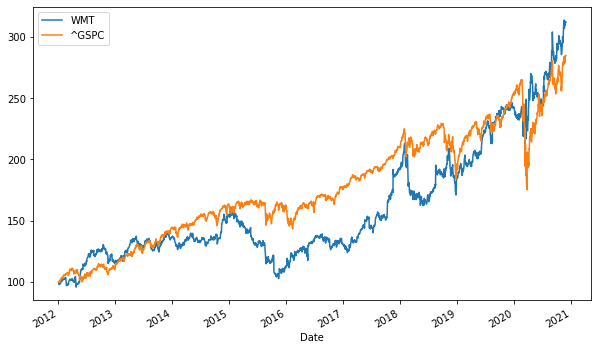

In [4]:
((data/data.iloc[0])*100).plot(figsize=(10,6))

#### 2.1: Calculating Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [5]:
sec_returns = np.log( data / data.shift(1) ) #evaluating security log returns

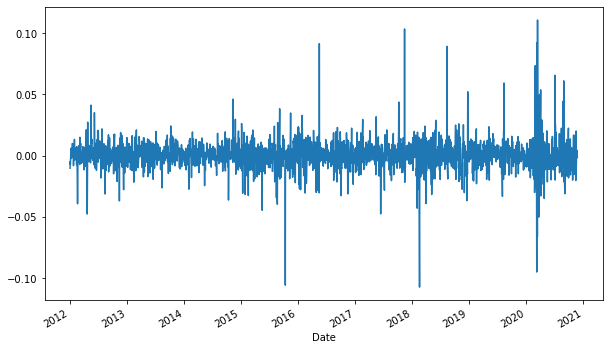

In [6]:
sec_returns['WMT'].plot(figsize=(10,6)) # log returns of walmart 

#### 2.2: Calculating covariance of security returns

In [7]:
cov = sec_returns.cov() * 250
cov

,WMT,^GSPC
WMT,0.038602,0.015247
^GSPC,0.015247,0.028019


#### 2.3: Calculating covariance of walmart returns with market index returns

In [8]:
cov_with_market = cov.iloc[0,1] # [0,1] points to WMT,^GSPC value which is 0.0152
cov_with_market

0.015246978804579356

#### 2.4: Calculating variance of market index returns

In [9]:
market_var = sec_returns['^GSPC'].var() * 250 # multiple by 250 to make annual as there are approx 250 trading session in an year 
market_var

0.0280192464579242

### Step 3: Calculating Beta and expected return

#### 3.1: Beta is used in the capital asset pricing model (CAPM) to describe the relationship between systematic risk and expected return for assets

**Beta:**
### $$            
\beta_{wmt} = \frac{\sigma_{wmt,m}}{\sigma_{m}^2}
$$

In [10]:
WMT_beta = cov_with_market / market_var
WMT_beta # beta for walmart stock

0.544160915514818

**3.2: Calculate the expected return of WMT (CAPM):**
### $$
\overline{r_{wmt}} = r_f + \beta_{wmt}(\overline{r_{m}} - r_f) 
$$


In [11]:
WMT_er = 0.025 + WMT_beta * 0.05 # 0.025 is avg return of US 10 year gov. bond which can be use for risk free rate
WMT_er # expected return for walmart

0.052208045775740904

In [12]:
print("Expected return for walmart using CAPM:")
print((str(round(WMT_er,3)*100) +'%'))

Expected return for walmart using CAPM:
5.2%


#### The capital asset pricing model (CAPM) is used to determine expected rate of return of an asset. This can help to make decisions about adding assets to a well-diversified portfolio.